In [1]:
%matplotlib notebook

In [2]:
# Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [3]:
# Load in CSV

brew_df = pd.read_csv("../CSVs/census-brewery-region-data.csv")
brew_df.head()

,State,City,2010 POP,Median 2010,2011 POP,Median 2011,2012 POP,Median 2012,2013 POP,Median 2013,...,2016 POP,Median 2016,2017 POP,Median 2017,Brewery Name,Country,Year Established,Still in Business?,Closed?,Region
0,Alabama,Birmingham,211739,42081,211516,42934,210660,43160,211094,43253,...,211263,44758,210710,46472,Back Forty Beer Company,UNITED STATES,2009,Y,N,SE
1,Alabama,Huntsville,180924,42081,182122,42934,183463,43160,185662,43253,...,191956,44758,194585,46472,Straight to Ale,UNITED STATES,2009,Y,N,SE
2,Alabama,Jasper,14386,42081,14292,42934,14169,43160,14083,43253,...,13768,44758,13618,46472,Twisted Barley Brewing Co,UNITED STATES,2015,Y,N,SE
3,Alabama,Jasper,14386,42081,14292,42934,14169,43160,14083,43253,...,13768,44758,13618,46472,Twisted Barley Brewing Co,UNITED STATES,2015,Y,N,SE
4,Alabama,Mobile,194582,42081,193989,42934,193776,43160,193429,43253,...,191590,44758,190265,46472,Old Majestic Brewing Co.,UNITED STATES,2019,Y,N,SE


In [4]:
# Removing Duplicates

brew_df.drop_duplicates(subset = "Brewery Name", keep='first', inplace = True)
brew_df.head()

,State,City,2010 POP,Median 2010,2011 POP,Median 2011,2012 POP,Median 2012,2013 POP,Median 2013,...,2016 POP,Median 2016,2017 POP,Median 2017,Brewery Name,Country,Year Established,Still in Business?,Closed?,Region
0,Alabama,Birmingham,211739,42081,211516,42934,210660,43160,211094,43253,...,211263,44758,210710,46472,Back Forty Beer Company,UNITED STATES,2009,Y,N,SE
1,Alabama,Huntsville,180924,42081,182122,42934,183463,43160,185662,43253,...,191956,44758,194585,46472,Straight to Ale,UNITED STATES,2009,Y,N,SE
2,Alabama,Jasper,14386,42081,14292,42934,14169,43160,14083,43253,...,13768,44758,13618,46472,Twisted Barley Brewing Co,UNITED STATES,2015,Y,N,SE
4,Alabama,Mobile,194582,42081,193989,42934,193776,43160,193429,43253,...,191590,44758,190265,46472,Old Majestic Brewing Co.,UNITED STATES,2019,Y,N,SE
6,Arizona,Peoria,154896,50448,155052,50752,155354,50256,156373,49774,...,164205,51340,168181,53510,Peoria Artisan Brewery,UNITED STATES,2013,Y,N,SW


In [5]:
brew_df = brew_df[(brew_df["Year Established"] >= 2010) & (brew_df["Year Established"] <= 2017)]
brew_df.head()

,State,City,2010 POP,Median 2010,2011 POP,Median 2011,2012 POP,Median 2012,2013 POP,Median 2013,...,2016 POP,Median 2016,2017 POP,Median 2017,Brewery Name,Country,Year Established,Still in Business?,Closed?,Region
2,Alabama,Jasper,14386,42081,14292,42934,14169,43160,14083,43253,...,13768,44758,13618,46472,Twisted Barley Brewing Co,UNITED STATES,2015,Y,N,SE
6,Arizona,Peoria,154896,50448,155052,50752,155354,50256,156373,49774,...,164205,51340,168181,53510,Peoria Artisan Brewery,UNITED STATES,2013,Y,N,SW
7,Arizona,Phoenix,1449039,50448,1467519,50752,1495880,50256,1521182,49774,...,1602042,51340,1626078,53510,Helio Basin Brewing Co,UNITED STATES,2016,Y,N,SW
8,Arizona,Phoenix,1449039,50448,1467519,50752,1495880,50256,1521182,49774,...,1602042,51340,1626078,53510,Invictus Brewing,UNITED STATES,2013,Y,N,SW
11,Arizona,Queen Creek,26554,50448,26869,50752,27134,50256,28645,49774,...,35551,51340,39184,53510,Owl's Orchard Brewery,UNITED STATES,2013,N,Y,SW


In [6]:
brew_closed_df = brew_df[(brew_df["Closed?"] == "Y")]
brew_closed_df.head()

,State,City,2010 POP,Median 2010,2011 POP,Median 2011,2012 POP,Median 2012,2013 POP,Median 2013,...,2016 POP,Median 2016,2017 POP,Median 2017,Brewery Name,Country,Year Established,Still in Business?,Closed?,Region
11,Arizona,Queen Creek,26554,50448,26869,50752,27134,50256,28645,49774,...,35551,51340,39184,53510,Owl's Orchard Brewery,UNITED STATES,2013,N,Y,SW
20,Arkansas,Fayetteville,73952,39267,75503,40149,76793,40531,78497,40768,...,83327,42336,85257,43813,Tanglewood Branch Beer Co.,UNITED STATES,2011,N,Y,SE
32,California,Huntington Beach,191342,60883,193184,61632,194563,61400,197588,61094,...,201004,63783,201874,67169,Beach City Brewery,UNITED STATES,2014,N,Y,W
96,California,Woodland,55547,60883,55744,61632,56281,61400,56732,61094,...,59102,63783,60012,67169,Black Dragon Brewery,UNITED STATES,2012,N,Y,W
99,Colorado,Aurora,326027,56456,332144,57685,338436,58244,344522,58433,...,362036,62520,366623,65458,Ursula Brewery,UNITED STATES,2014,N,Y,W


In [7]:
# Create Groups for Regions
reg_close_group = brew_closed_df.groupby('Region')

# Count how many times each Year Established appears
count_reg_close = reg_close_group['Region'].count()

count_reg_close

Region
MW     4
NE     2
SE     2
SW     4
W     10
Name: Region, dtype: int64

<IPython.core.display.Javascript object>


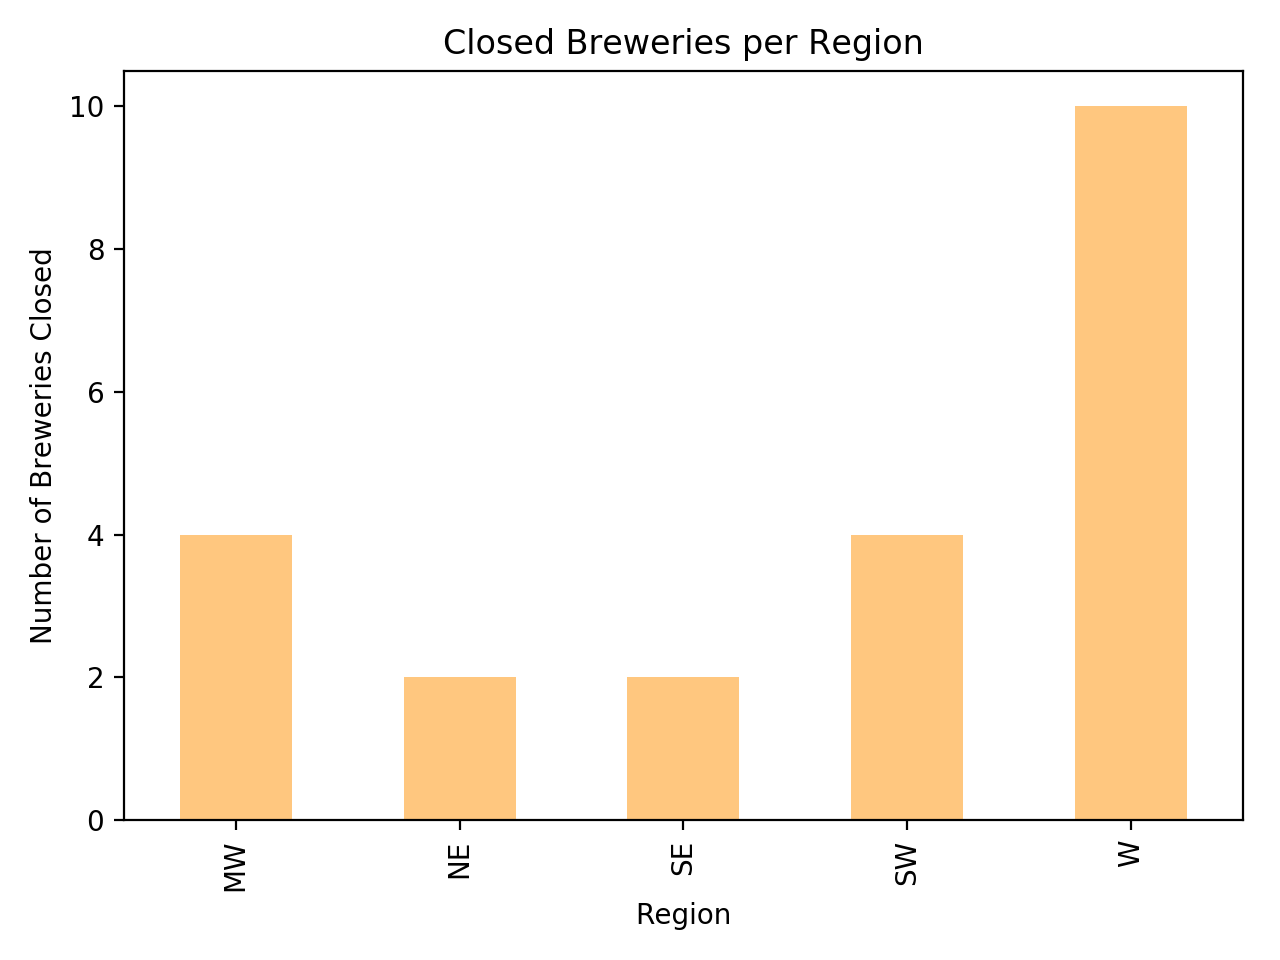

In [8]:
# Create a bar chart based off the group series

reg_chart = count_reg_close.plot(kind='bar', colormap="copper_r")

# Set xlabel & ylabel & title

plt.title("Closed Breweries per Region")
plt.xlabel("Region")
plt.ylabel("Number of Breweries Closed")


plt.show()
plt.tight_layout()

In [9]:
plt.savefig("../Images/Closed-Breweries-by-Region.png")